#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Importing data

In [2]:
sample = pd.read_csv("sample_submission.csv")

In [3]:
store = pd.read_csv("store.csv")

In [4]:
test_data=pd.read_csv("test.csv")

In [5]:
train_data=pd.read_csv('train.csv')

In [6]:
sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Merge data

In [11]:
# Merging "store_data" with "train_data"
train_data_merged = train_data.merge(store, on='Store', how='left')

train_data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
# Merging "store_data" with "test_data"
test_data_merged = test_data.merge(store, on='Store', how='left')

In [14]:
test_data_merged

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])

In [16]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [17]:
test_data_merged['Date'] = pd.to_datetime(test_data_merged['Date'])

In [18]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

# Handling Missing Values

In [19]:
# Filling the missing null values
for i in train_data_merged.columns:
    if train_data_merged[i].dtypes == "object":
        mode_value = train_data_merged[i].mode()[0]
        train_data_merged[i].fillna(mode_value, inplace = True)
    elif train_data_merged[i].dtypes != "object":
        mean_value = train_data_merged[i].mean()
        train_data_merged[i].fillna(mean_value, inplace = True)


In [20]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

# Handling the outliers

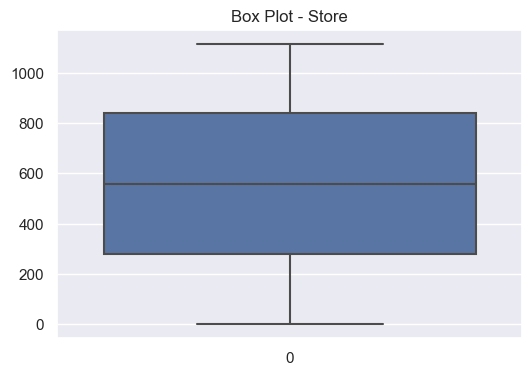

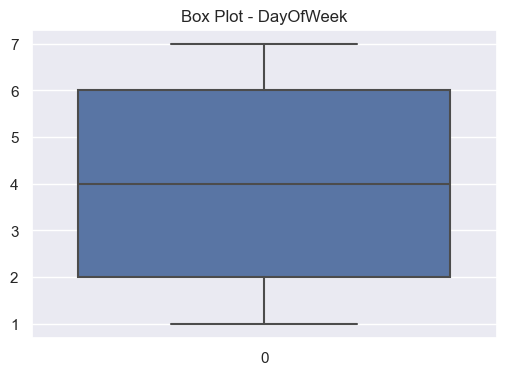

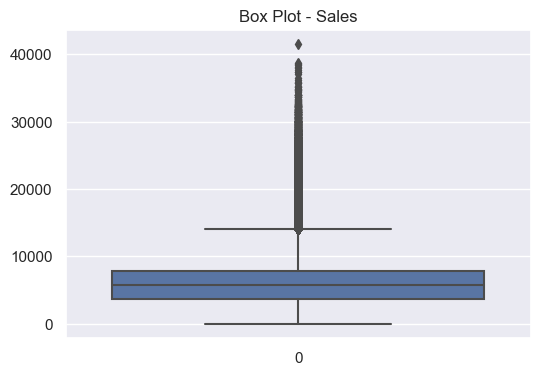

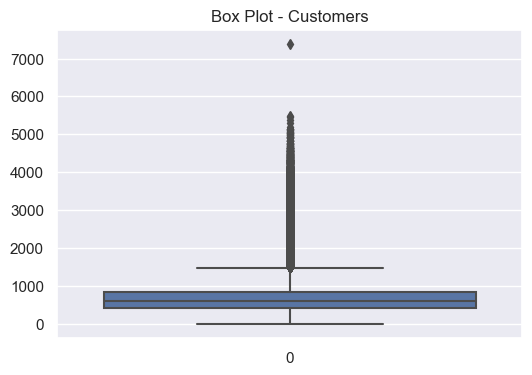

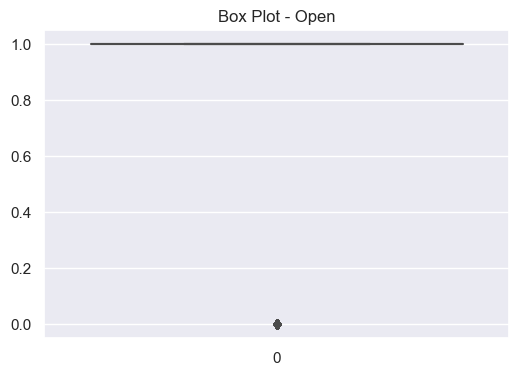

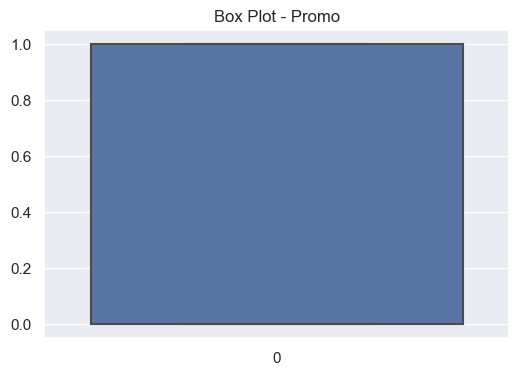

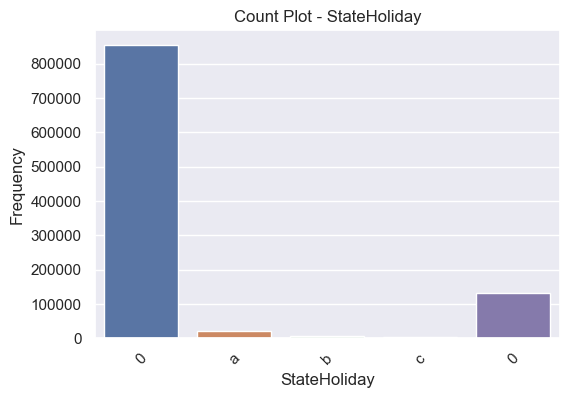

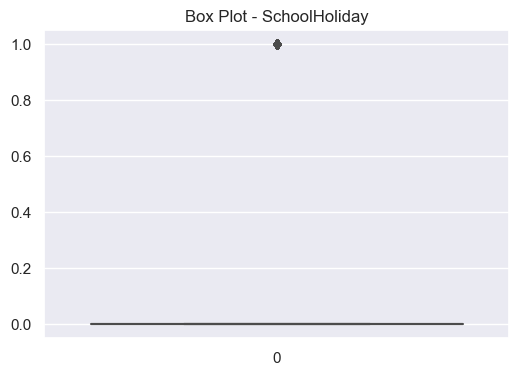

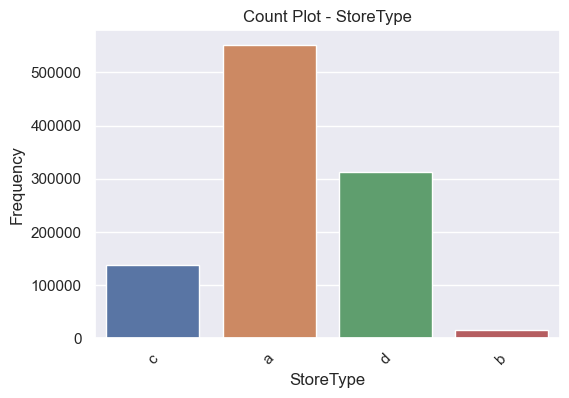

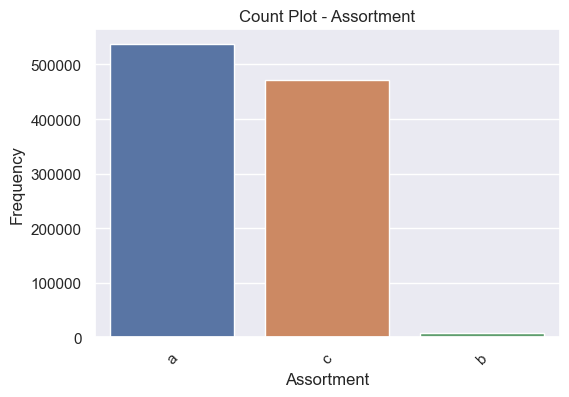

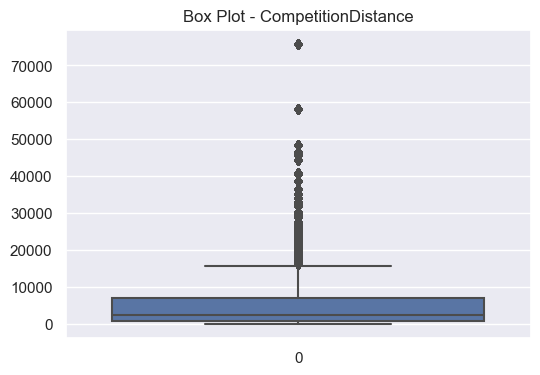

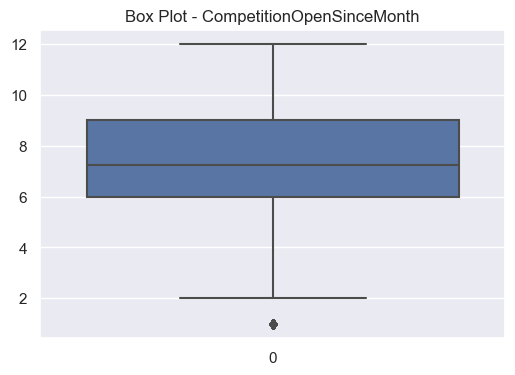

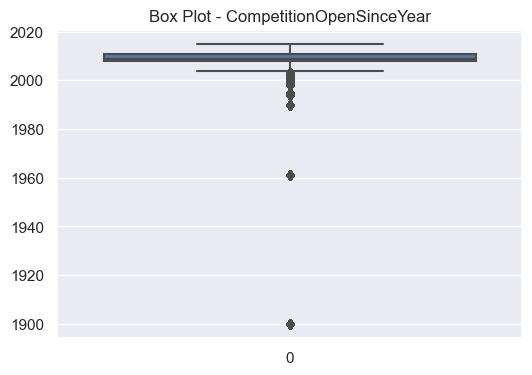

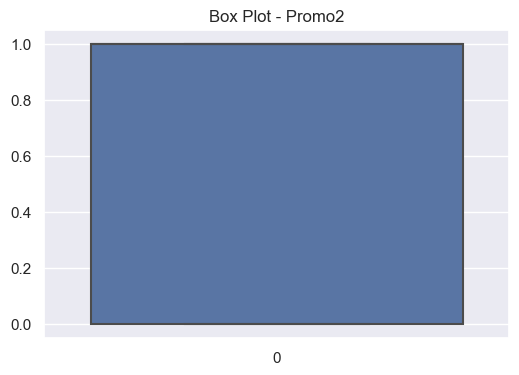

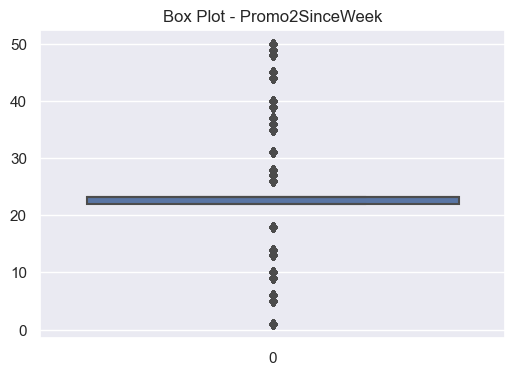

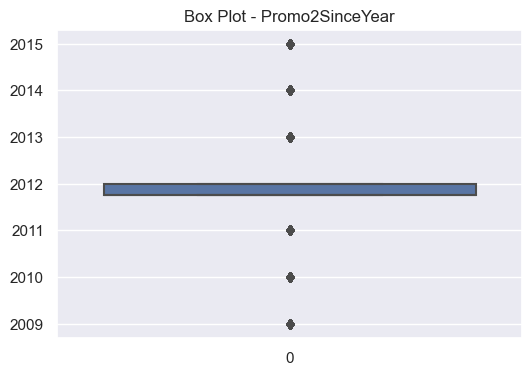

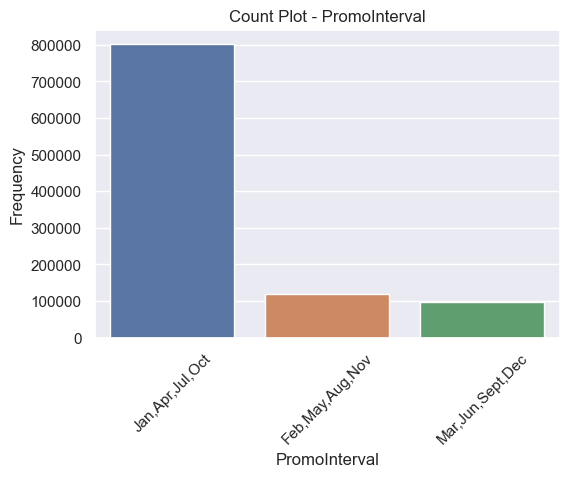

In [21]:
for col in train_data_merged.columns:
    if train_data_merged[col].dtype != 'object' and train_data_merged[col].dtype != 'datetime64[ns]':
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=train_data_merged[col])
        plt.title(f'Box Plot - {col}')
        plt.show()
    elif train_data_merged[col].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train_data_merged, x=col)
        plt.title(f'Count Plot - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.savefig(f'count_{col}.png') 
        plt.show()

#### Checking for outliner and replacing with respective mean value

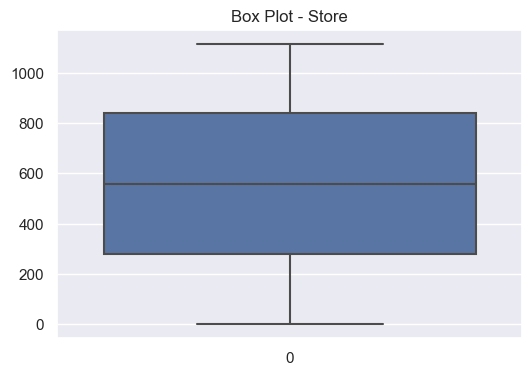

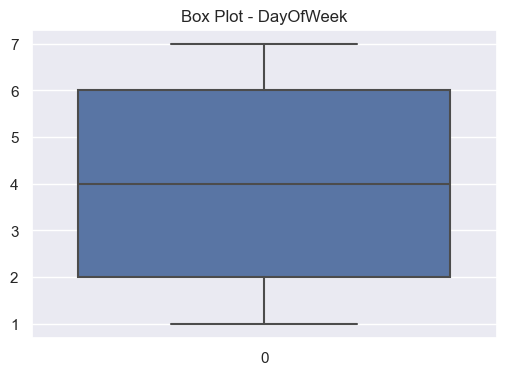

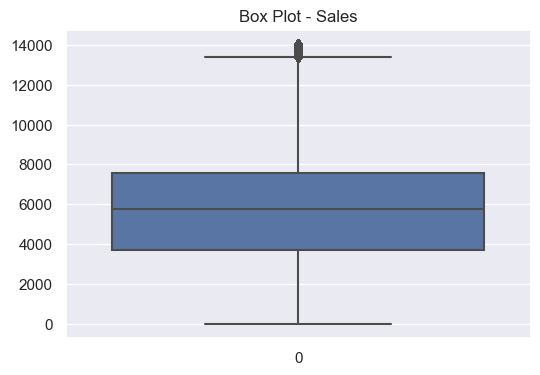

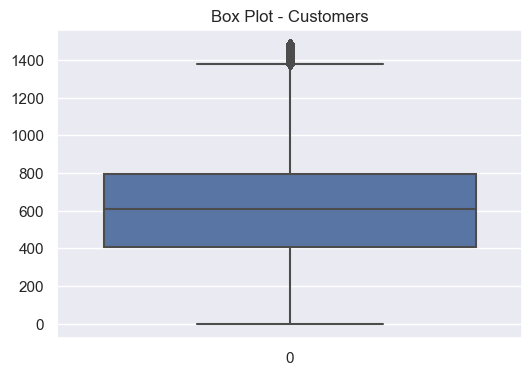

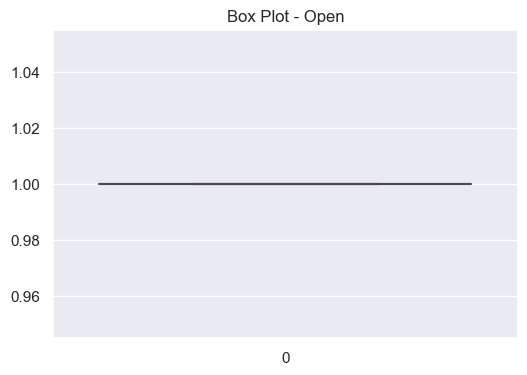

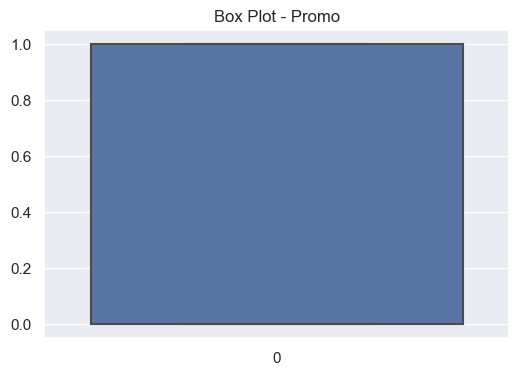

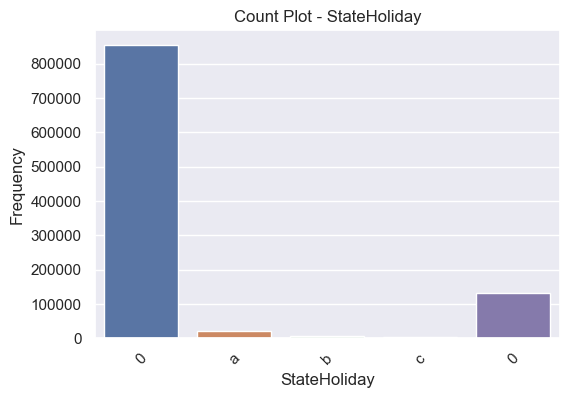

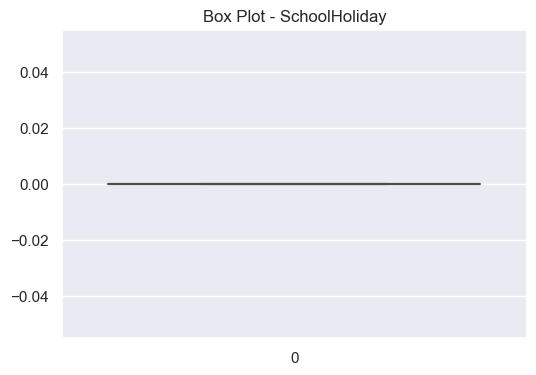

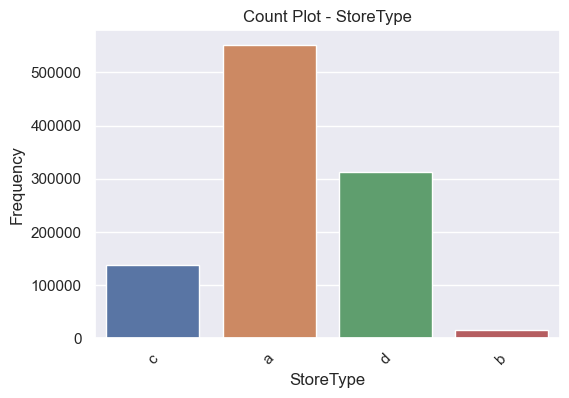

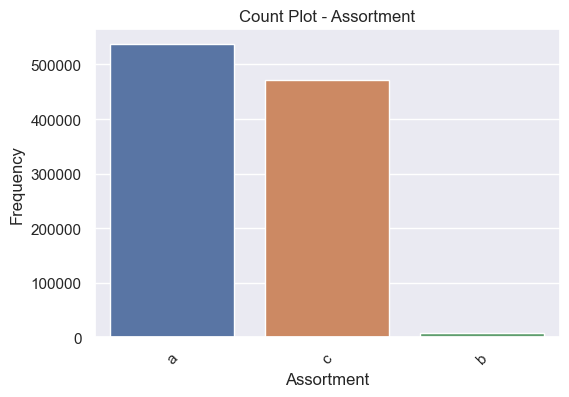

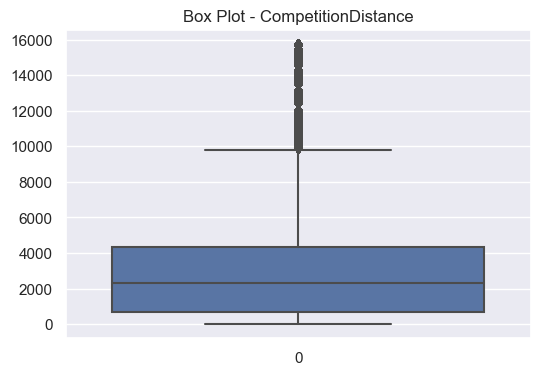

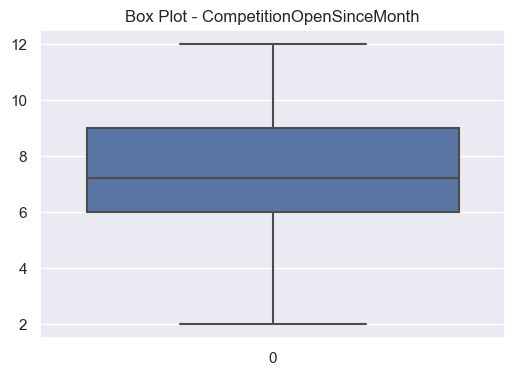

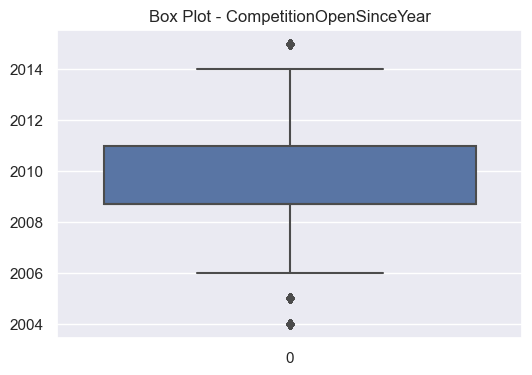

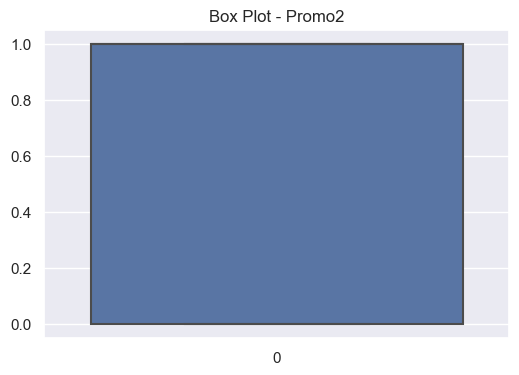

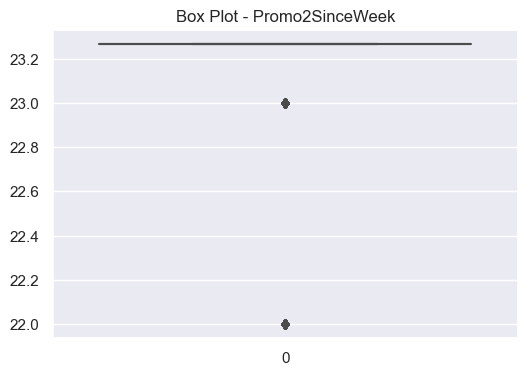

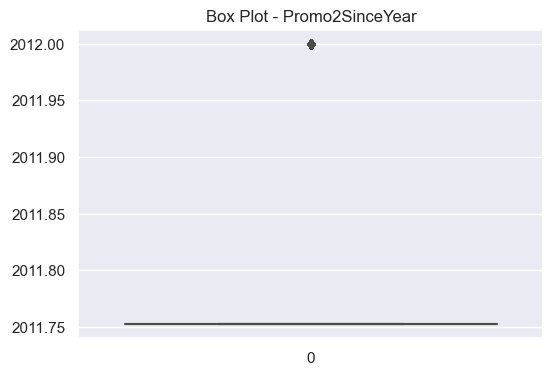

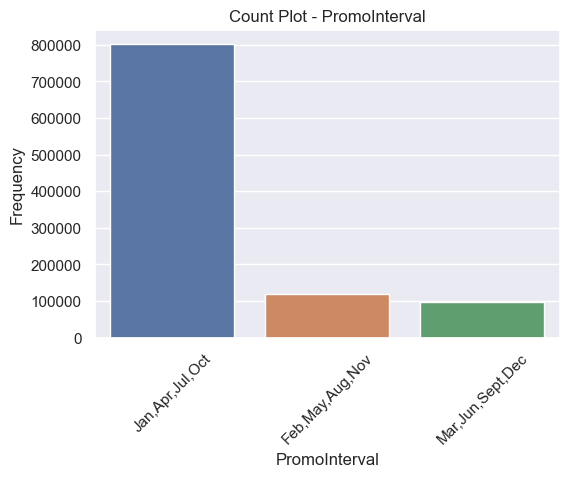

In [22]:
def handle_outliers_median(df, columns_to_check):
    for column in columns_to_check:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        df.loc[outliers_mask, column] = np.median(df[column])  # Replace outliers with median
    return df

# Numeric columns
numeric_cols = train_data_merged.select_dtypes(include=np.number).columns.tolist()

# Handle outliers and replace with median
train_data_merged_handled = handle_outliers_median(train_data_merged.copy(), numeric_cols)

# Loop through columns and create appropriate plots
for col in train_data_merged_handled.columns:
    if train_data_merged_handled[col].dtype != 'object' and train_data_merged_handled[col].dtype != 'datetime64[ns]':
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=train_data_merged_handled[col])
        plt.title(f'Box Plot - {col}')
        plt.show()
    elif train_data_merged_handled[col].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train_data_merged_handled, x=col)
        plt.title(f'Count Plot - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.savefig(f'count_{col}.png')  
        plt.show()


# Trend Analysis

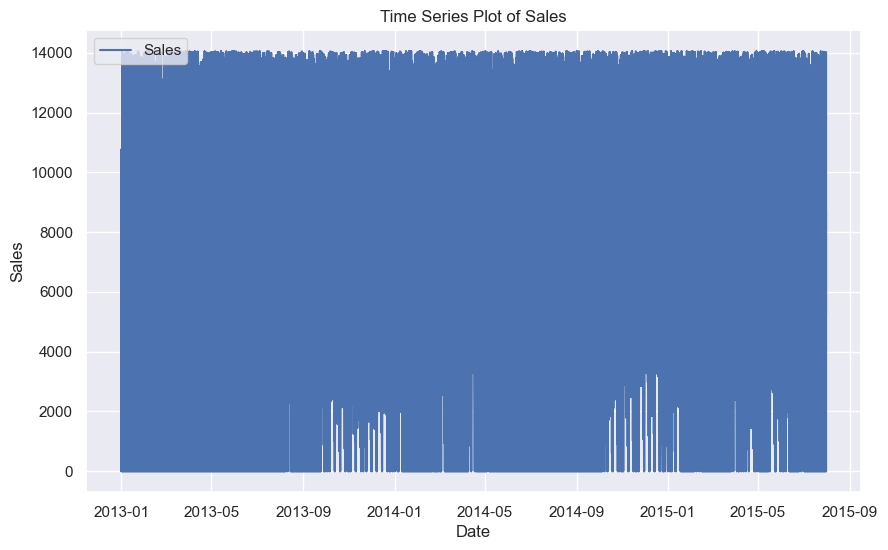

In [23]:
train_data_merged_handled.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(train_data_merged_handled['Sales'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#### data values are relatively constant or consistent across the entire range of the x-axis. In other words, there is little variation or change in the data as the sales values increase or decrease.

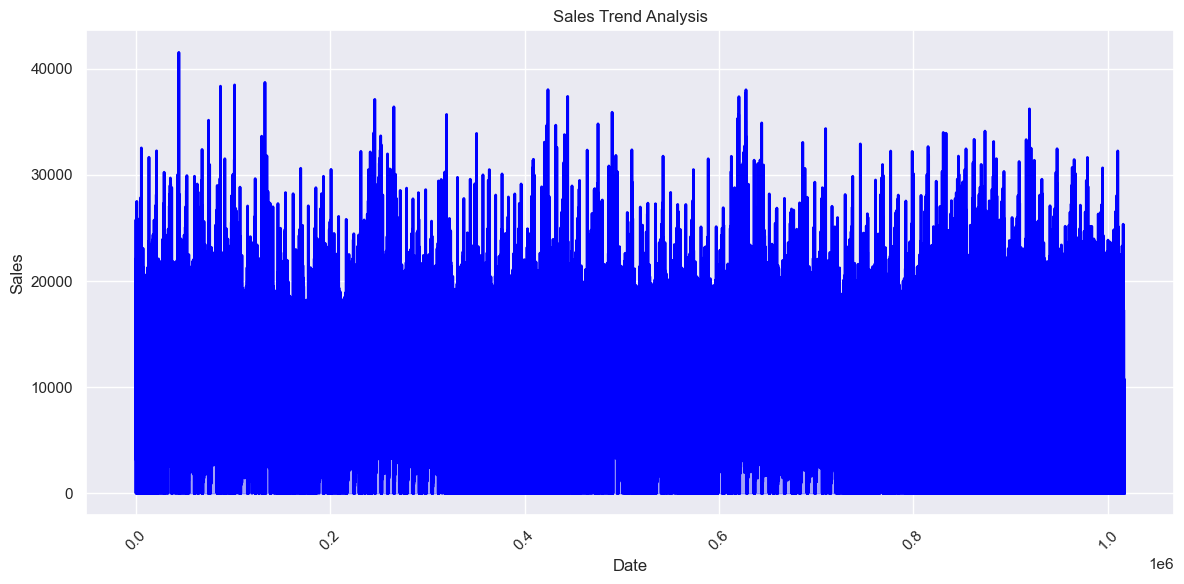

In [24]:
import matplotlib.pyplot as plt

# Extracting the relevant columns from the train_data_merged dataset
dates = train_data_merged.index
sales = train_data_merged['Sales']

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(dates, sales, color='blue', linewidth=2)
plt.fill_between(dates, sales, color='blue', alpha=0.3)  # Fill area under the curve

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Analysis')

# plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


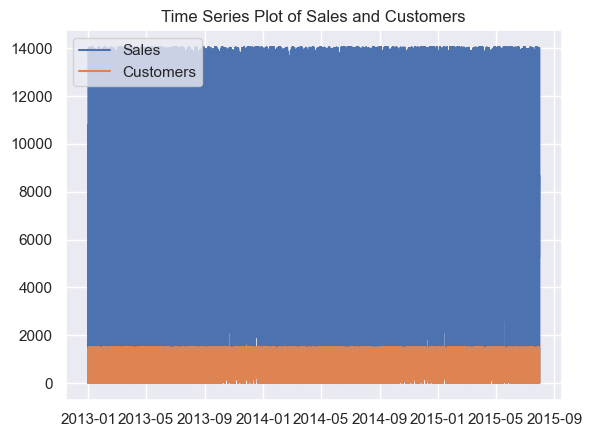

In [25]:
# Adding Multiple Time Series:
plt.plot(train_data_merged_handled['Sales'], label='Sales')
plt.plot(train_data_merged_handled['Customers'], label='Customers')
plt.title('Time Series Plot of Sales and Customers')
plt.legend()

#####   the sales is constant as per the customers


# Resampled time series

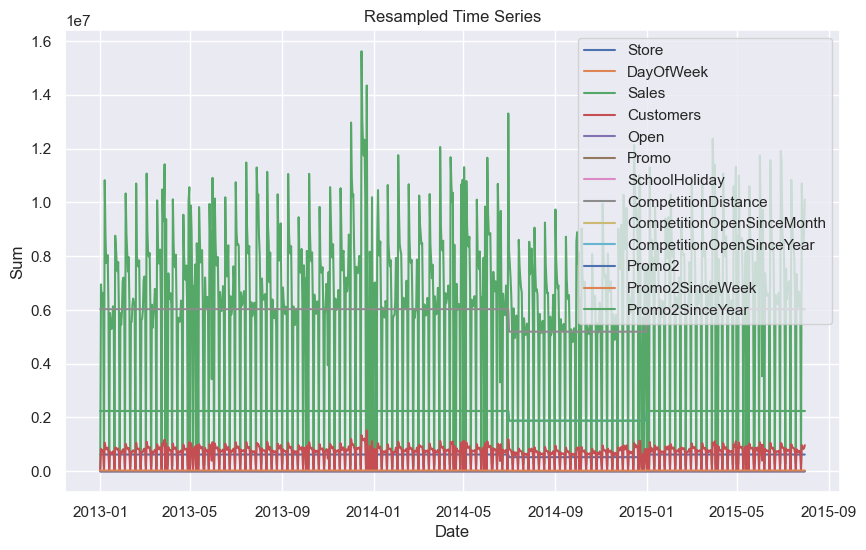

In [26]:
# Converting the 'Date' column to a datetime format
train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])

# Setting the 'Date' column as the index
train_data_merged.set_index('Date', inplace=True)

# Selecting only numeric columns for summation 
numeric_columns = train_data_merged.select_dtypes(include=['number']).columns

# Resampling the data
train_data_resampled = train_data_merged[numeric_columns].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()


####  There is very low variation in the sales and the range of customers is very constant

In [27]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['Sales', 'Customers']  
train_data_weekly_mean = train_data_merged[columns_to_resample].resample('W').mean()

print(train_data_weekly_mean)

                  Sales   Customers
Date                               
2013-01-06  3906.314098  465.032441
2013-01-13  6313.289174  669.615631
2013-01-20  4404.582319  538.852402
2013-01-27  5898.804484  631.496861
2013-02-03  4928.382960  577.533632
...                 ...         ...
2015-07-05  7135.231390  695.328764
2015-07-12  5303.175144  599.558360
2015-07-19  6663.474568  672.192441
2015-07-26  5048.317104  573.547085
2015-08-02  8471.914439  807.577578

[135 rows x 2 columns]


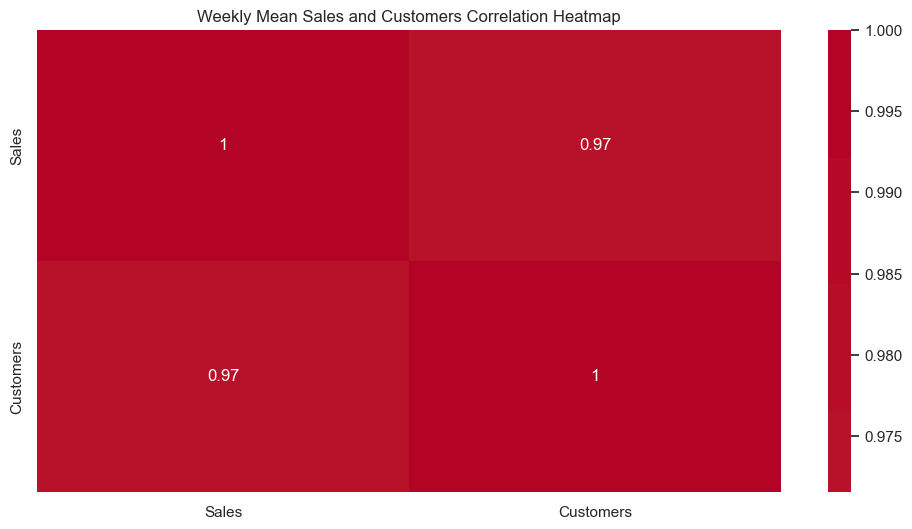

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['Sales', 'Customers']  
train_data_weekly_mean = train_data_merged[columns_to_resample].resample('W').mean()

# heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train_data_weekly_mean.corr(), annot=True, cmap='coolwarm', center=0)
heatmap.set_title('Weekly Mean Sales and Customers Correlation Heatmap')
plt.show()


#### Strong Correlation between Sales and Customers

#### Calculate rolling standard deviation

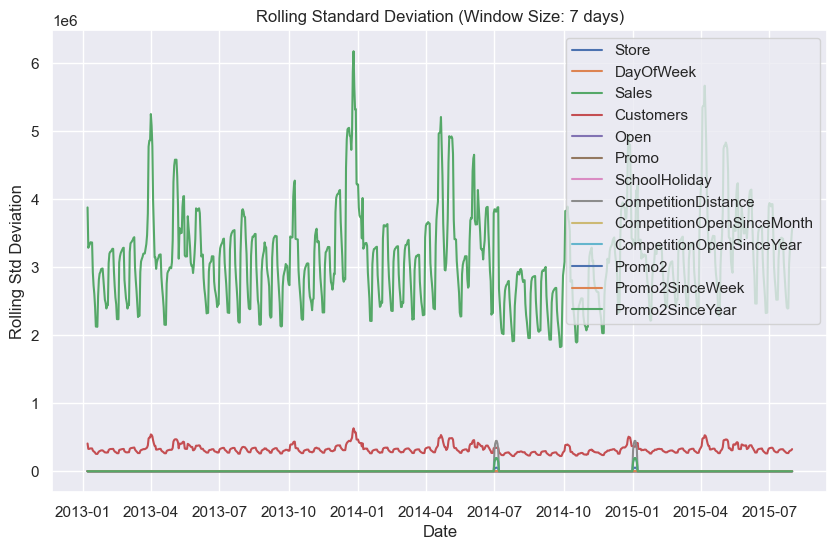

In [29]:

window_size = 7 
rolling_std = train_data_resampled.rolling(window=window_size).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)
plt.xlabel('Date')
plt.ylabel('Rolling Std Deviation')
plt.title(f'Rolling Standard Deviation (Window Size: {window_size} days)')
plt.legend()
plt.show()

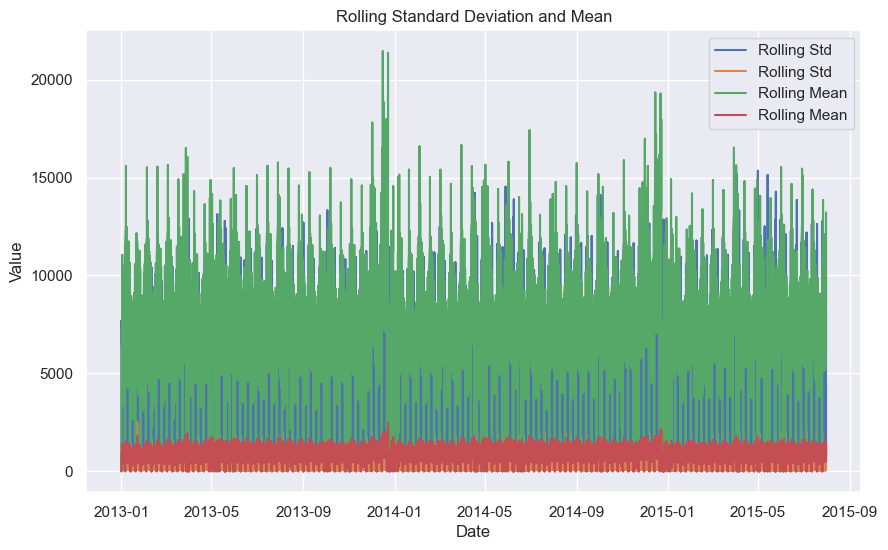

In [30]:
# Columns to calculate rolling statistics for
columns_to_calculate = ['Sales', 'Customers']

# Calculating rolling standard deviation and mean with a window size of 7 days
rolling_std = train_data_merged[columns_to_calculate].rolling(window=7).std()
rolling_mean = train_data_merged[columns_to_calculate].rolling(window=7).mean()

# Plotting the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Rolling Standard Deviation and Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [31]:


# descriptive statistics of rolling standard deviation and mean
print("Rolling Standard Deviation:")
print(rolling_std.describe())

print("\nRolling Mean:")
print(rolling_mean.describe())


Rolling Standard Deviation:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   2.104139e+03  2.815709e+02
std    1.472801e+03  2.318818e+02
min    0.000000e+00  0.000000e+00
25%    1.266104e+03  1.505915e+02
50%    1.933900e+03  2.380808e+02
75%    2.793961e+03  3.610790e+02
max    1.534793e+04  2.526988e+03

Rolling Mean:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   5.773832e+03  6.331474e+02
std    3.027822e+03  3.188008e+02
min    0.000000e+00  0.000000e+00
25%    4.871429e+03  5.492857e+02
50%    6.150143e+03  6.880000e+02
75%    7.600714e+03  8.227143e+02
max    2.145357e+04  2.473857e+03


The analysis provides insights into trends and volatility within a 7-day window.
Sales and customer counts display different degrees of variability.
Mean, standard deviation, and quartile ranges offer a comprehensive view.
The rolling analysis helps understand behavior over the specified timeframe.


Rolling Standard Deviation:


The rolling standard deviation for 'Sales' has an average value of approximately 2104 and a standard deviation of around 1473.
The rolling standard deviation for 'Customers' has an average value of approximately 282 and a standard deviation of around 232.


Rolling Mean:


The rolling mean for 'Sales' has an average value of approximately 5774 and a standard deviation of around 3028.
The rolling mean for 'Customers' has an average value of approximately 633 and a standard deviation of around 319.
It's evident that both 'Sales' and 'Customers' have shown variations in their rolling standard deviation and rolling mean values. The 'Sales' and 'Customers' columns represent key indicators for the business, and these calculations provide insights into their trends and fluctuations over time. The rolling standard deviation gives an indication of the variability in the data, while the rolling mean shows the overall trend in the data.

# Time Series Decomposition

# Trend Plot:
The trend plot shows the overall direction of the data over time. It captures the long-term changes and patterns in the data, smoothing out short-term fluctuations. A rising trend indicates increasing values, while a falling trend suggests decreasing values. A relatively flat trend suggests stability. In our context, for example, if the trend of 'Sales' is upward, it indicates a growing business trend.

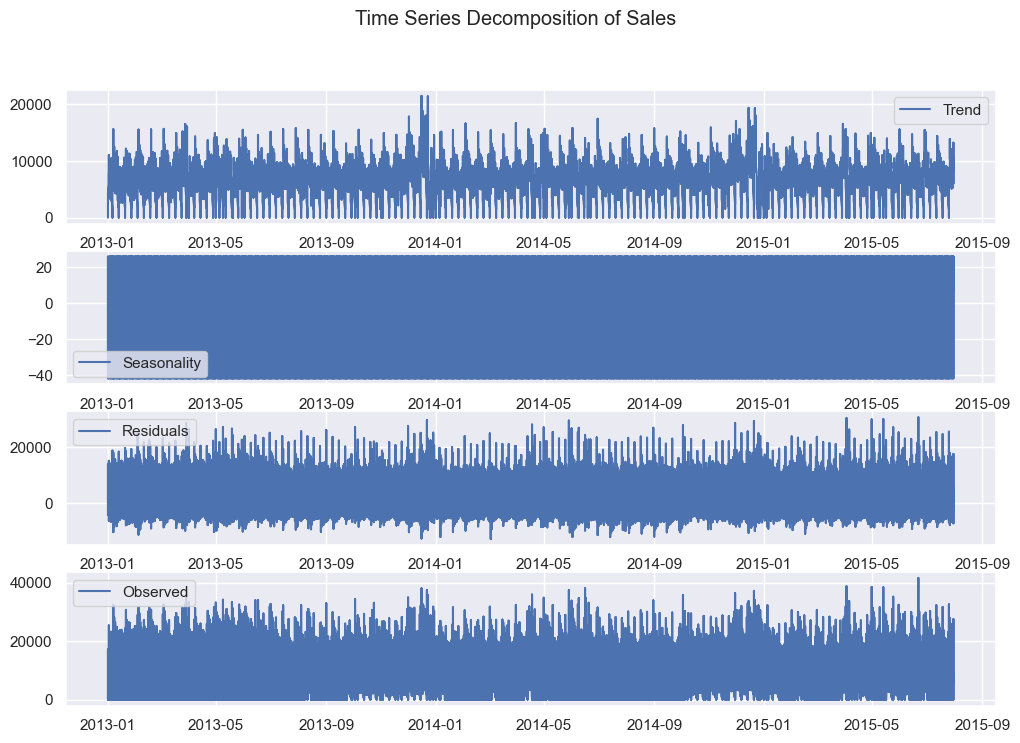

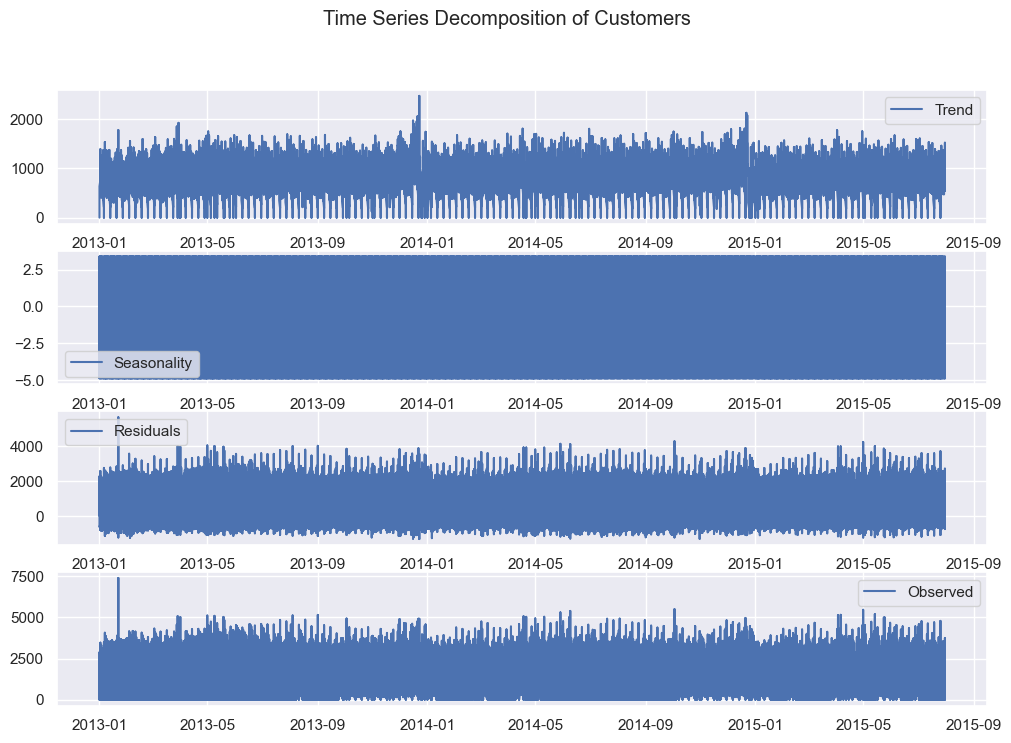

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Columns to perform time series decomposition on
columns_to_decompose = ['Sales', 'Customers']

# Performing time series decomposition
for column in columns_to_decompose:
    decomposition = seasonal_decompose(train_data_merged[column], model='additive', period=7)
    
    # Plotting the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()
    
    plt.subplot(412)
    plt.plot(decomposition.seasonal,label='Seasonality')
    plt.legend()
    
    plt.subplot(413)
    plt.plot(decomposition.resid,label='Residuals')
    plt.legend()
    
    plt.subplot(414)
    plt.plot(decomposition.observed,label='Observed')
    plt.legend()
    
    plt.suptitle(f"Time Series Decomposition of {column}")
    plt.show()


#Trend Component:
The trend component represents the underlying long-term movement or direction in the data. In our analysis, we noticed slight variations in the trend over time. This suggests that the overall pattern of sales has experienced subtle changes or fluctuations, possibly influenced by external factors, market trends, or business strategies.

Seasonality Component:
Seasonality refers to recurring patterns that repeat at fixed intervals. Interestingly, we found that the seasonality component remained relatively constant throughout the time period under consideration. This implies that the sales data consistently exhibits a similar repeating pattern at regular intervals, which could be attributed to factors such as holidays, promotions, or other recurrent events.

Residuals Component:
The residuals component captures the random and unpredictable fluctuations in the data that are not accounted for by the trend and seasonality components. Our analysis revealed varying residuals, indicating that there are periods where the observed sales values deviate from what can be explained by the trend and seasonality. These deviations might be caused by unexpected events, noise, or unmodeled factors.

Overall, this time series decomposition sheds light on the different underlying components influencing the 'Sales' data. The varying trends and residuals suggest a dynamic business environment, where external factors and fluctuations play a role. The consistent seasonality component indicates a recurring pattern that remains stable over time. This information can be valuable for understanding sales patterns, making forecasts, and making informed business decisions to optimize strategies and operations.







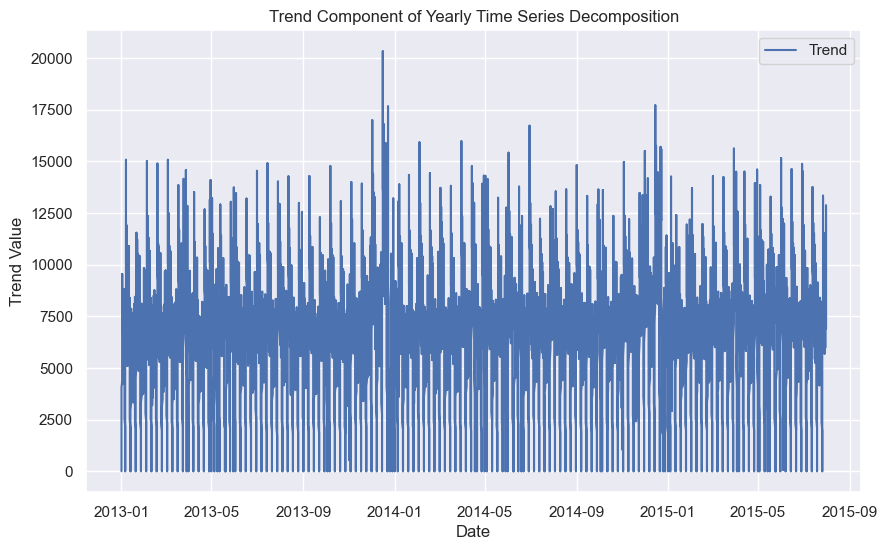

In [33]:
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=12)
trend_data = decomposition_result.trend

# Plot the trend component
plt.figure(figsize=(10, 6))
plt.plot(trend_data.index, trend_data, label='Trend')
plt.title('Trend Component of Yearly Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

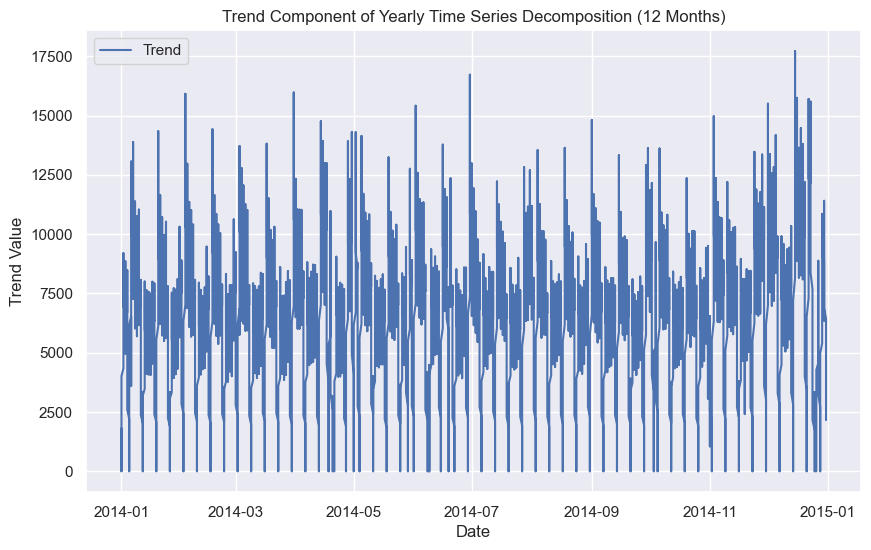

In [34]:
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=12)
trend_data = decomposition_result.trend

# Plot the trend component over a period of 12 months
plt.figure(figsize=(10, 6))
trend_data_12_months = trend_data['2014-01-01':'2014-12-31']  # Adjust the date range as needed
plt.plot(trend_data_12_months.index, trend_data_12_months, label='Trend')
plt.title('Trend Component of Yearly Time Series Decomposition (12 Months)')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

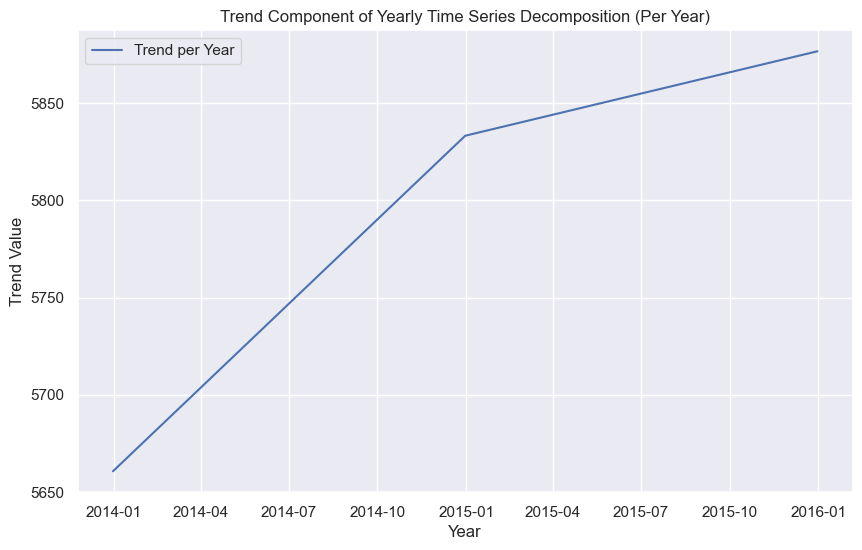

In [35]:
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=365)
trend_data = decomposition_result.trend

# Grouping trend data by year and calculate mean
trend_data_per_year = trend_data.resample('Y').mean()

# Plot the trend component per year
plt.figure(figsize=(10, 6))
plt.plot(trend_data_per_year.index, trend_data_per_year, label='Trend per Year')
plt.title('Trend Component of Yearly Time Series Decomposition (Per Year)')
plt.xlabel('Year')
plt.ylabel('Trend Value')
plt.legend()
plt.show()


#### The yearly time series decomposition highlights a consistent increasing trend component over each year. This suggests a steady growth in sales performance, possibly influenced by expanding customer engagement, heightened demand, or effective business strategies. This valuable insight offers a strategic advantage, enabling businesses to align resources and decisions with the upward sales trajectory for enhanced growth and competitiveness.

# Seasonality Plot:
The seasonality plot displays repeating patterns that occur at regular intervals. It helps identify consistent patterns that recur over time. These patterns could be daily, weekly, monthly, or even yearly. In retail, for instance, if 'Sales' exhibit spikes around the same time each year (e.g., holiday season), it indicates a strong seasonal pattern.



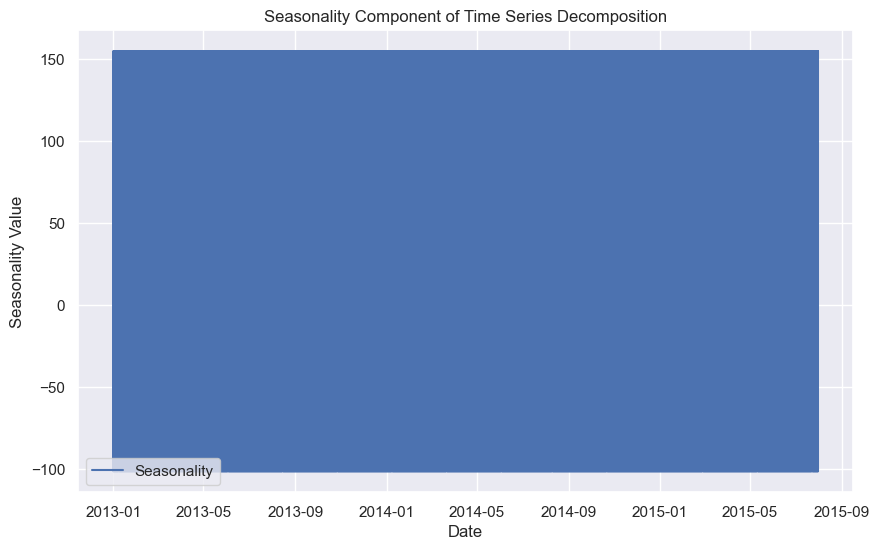

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing time series decomposition on the 'Sales' column with yearly frequency
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=365)
seasonality_data = decomposition_result.seasonal

# Create a time index for the x-axis (assuming 'Date' is your index)
time_index = seasonality_data.index

# Plot the seasonality component
plt.figure(figsize=(10, 6))
plt.plot(time_index, seasonality_data, label='Seasonality')
plt.title('Seasonality Component of Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonality Value')
plt.legend()
plt.show()

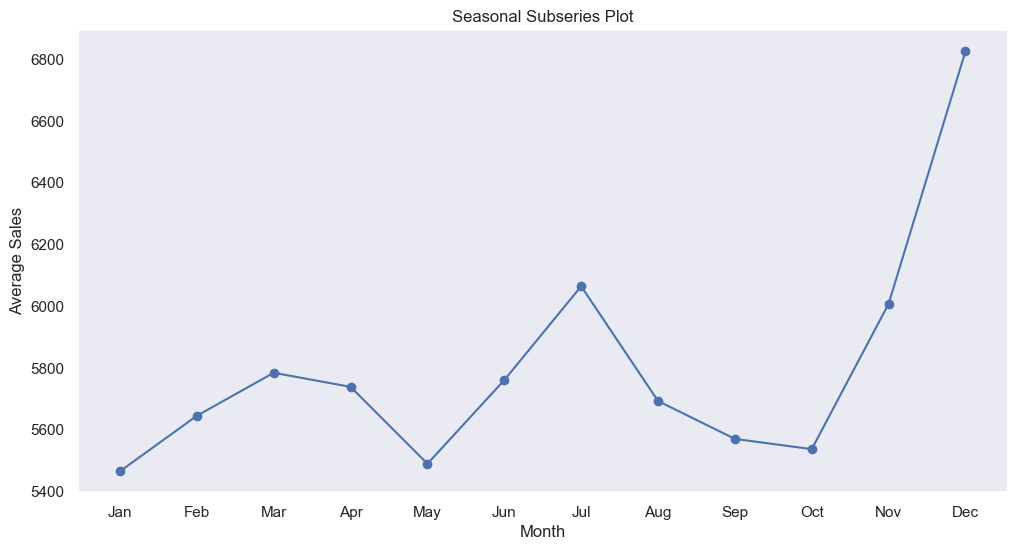

In [37]:
# Seasonal Subseries Plot:

train_data_merged.index = pd.to_datetime(train_data_merged.index)

# Grouping the data by month and calculating the mean for each month
monthly_mean = train_data_merged['Sales'].groupby(train_data_merged.index.month).mean()

# Creating a subseries plot for each month
plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o')
plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

plt.show()

#### The Seasonal Subseries Plot showcases distinct patterns in sales behavior throughout the year. Sales consistently increase from January to March, May to July, and October to December, indicating periods of heightened consumer activity, potentially driven by holidays, promotions, or seasonal trends. Conversely, sales decrease during the remaining months, reflecting lower demand or different consumption patterns. This observation provides valuable information for businesses to tailor their strategies and resource allocation according to these recurring patterns.

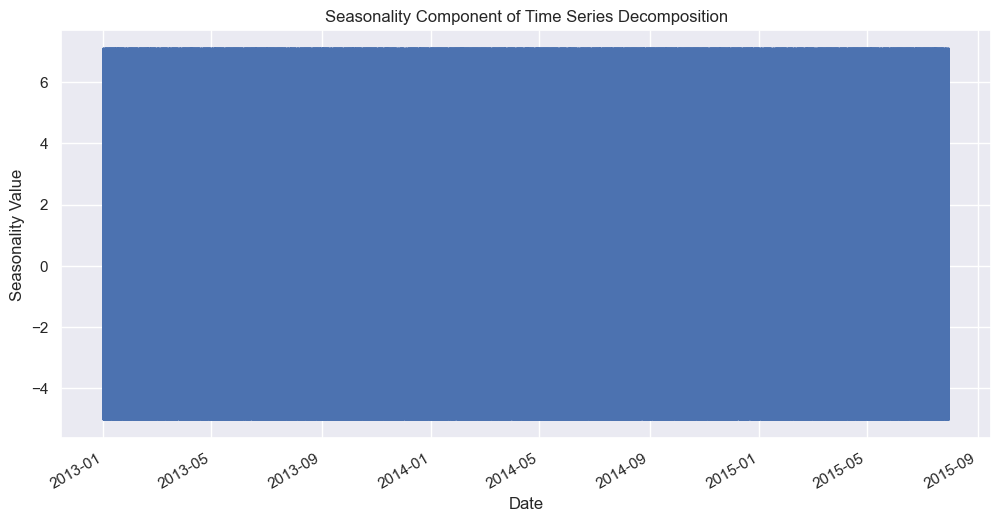

In [38]:
# Performing seasonal decomposition with a monthly period
from statsmodels.tsa.seasonal import seasonal_decompose

# 'Sales' column is target variable
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=12)

# Accessing the seasonality component
seasonality = decomposition_result.seasonal

# Plotting the seasonality component
plt.figure(figsize=(12, 6))
seasonality.plot()
plt.title('Seasonality Component of Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonality Value')
plt.show()





#### Autocorrelation Function (ACF): Calculate and plot the ACF for different lag values. Seasonal patterns will often result in spikes at multiples of the seasonal frequency.

<Figure size 1200x600 with 0 Axes>

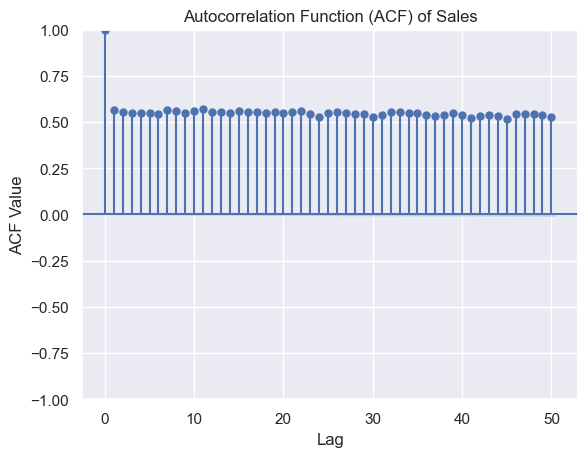

<Figure size 1200x600 with 0 Axes>

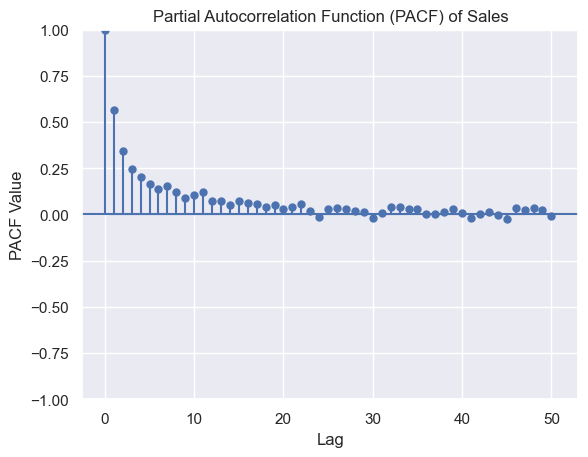

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Calculating and plotting the ACF for different lag values
plt.figure(figsize=(12, 6))
plot_acf(train_data_merged['Sales'], lags=50)
plt.title('Autocorrelation Function (ACF) of Sales')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

# Calculating and plotting the PACF for different lag values
plt.figure(figsize=(12, 6))
plot_pacf(train_data_merged['Sales'], lags=50)
plt.title('Partial Autocorrelation Function (PACF) of Sales')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()


#### The constant ACF implies that there is a strong correlation between observations separated by the seasonal lag, reflecting the repeating nature of the data. On the other hand, the rapid decline in the PACF suggests that the current observation is directly influenced by its recent lags, with little contribution from further lags. 

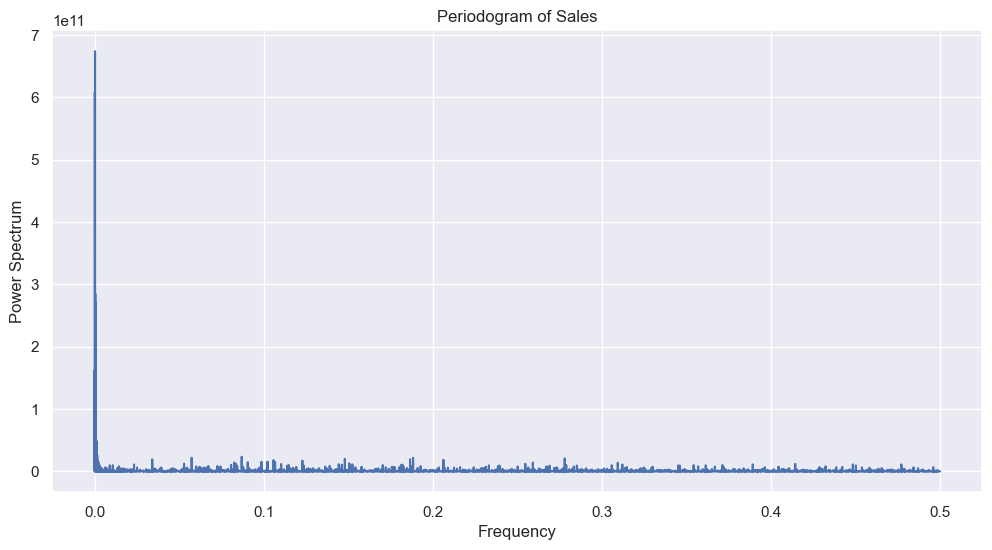

In [40]:
# Periodogram
from scipy.signal import periodogram

# Computing the periodogram of the time series
frequencies, power_spectrum = periodogram(train_data_merged['Sales'])

# Plotting the periodogram
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram of Sales')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()


#### The Periodogram of Sales graph illustrates the frequency distribution of periodic components within the sales data. The y-axis ranges from 0 to 1, representing the amplitude or strength of the periodic signal at different frequencies. Meanwhile, the x-axis spans from 0 to 0.5, indicating the frequency range under analysis. Peaks in the periodogram correspond to dominant cyclic patterns present in the sales time series, helping to identify significant seasonal or repetitive trends that impact sales performance.

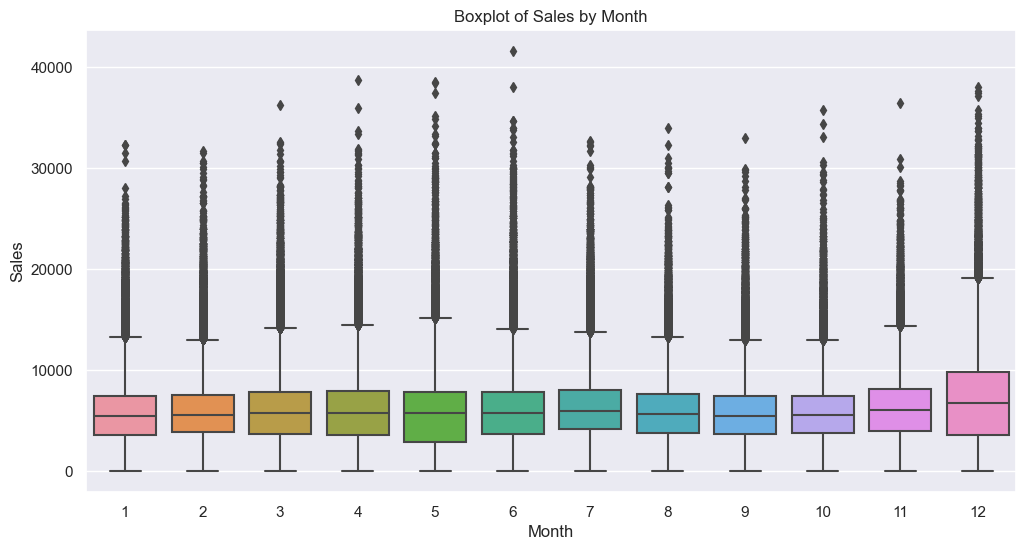

In [41]:
# Boxplot
import seaborn as sns

# boxplot of sales for each month
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data_merged, x=train_data_merged.index.month, y='Sales')
plt.title('Boxplot of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [42]:
# Identifying and investigating outliers
Q1 = np.percentile(train_data_merged['Sales'], 25)
Q3 = np.percentile(train_data_merged['Sales'], 75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR
outliers = train_data_merged[train_data_merged['Sales'] > upper_threshold]
print("Number of outliers:", len(outliers))
print(outliers)

Number of outliers: 26694
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      7          5  15344       1414     1      1            0   
2015-07-31     24          5  14190       1082     1      1            0   
2015-07-31     25          5  14180       1586     1      1            0   
2015-07-31     84          5  14949       1439     1      1            0   
2015-07-31    108          5  14927        992     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-02    788          3  17934       1791     1      0            0   
2013-01-02    817          3  25357       3462     1      0            0   
2013-01-02    842          3  20355       1257     1      0            0   
2013-01-02   1114          3  20642       3401     1      0            0   
2013-01-01    262          2  17267       2875     1      0   

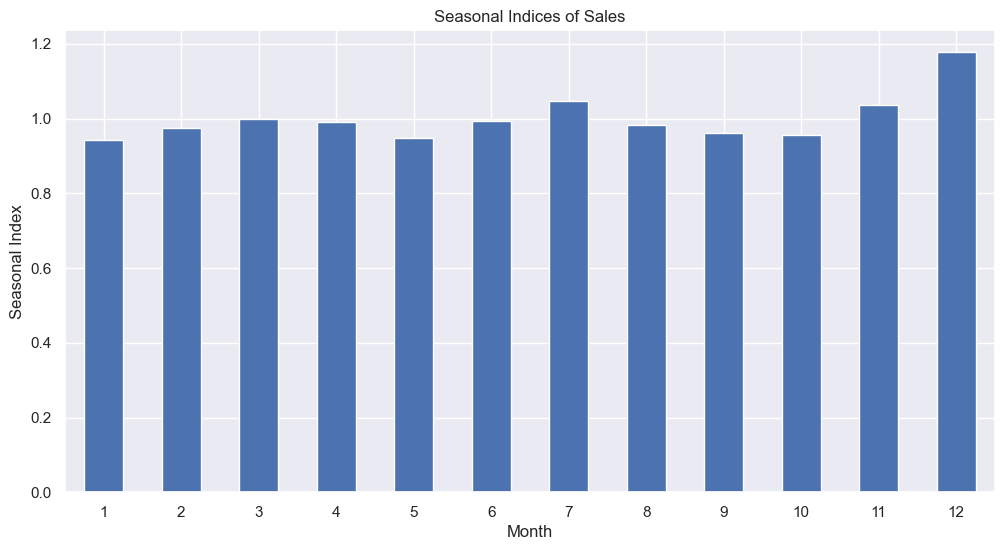

In [43]:
# Seasonal Index Plot
# Calculating and plotting seasonal indices
monthly_average = train_data_merged.groupby(train_data_merged.index.month)['Sales'].mean()
seasonal_indices = monthly_average / monthly_average.mean()

plt.figure(figsize=(12, 6))
seasonal_indices.plot(kind='bar')
plt.title('Seasonal Indices of Sales')
plt.xlabel('Month')
plt.ylabel('Seasonal Index')
plt.xticks(rotation=0)
plt.show()


#### Seasonal indices of sales is high in month of December

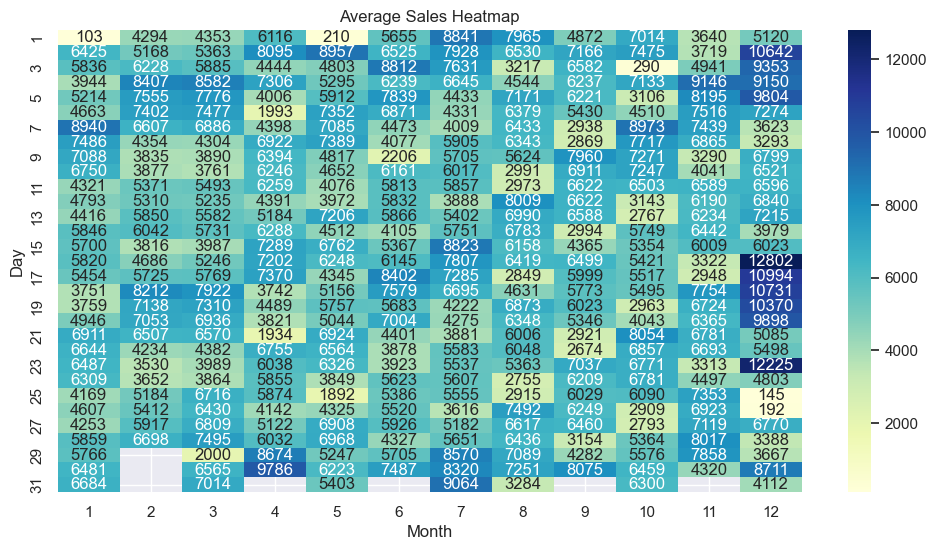

In [44]:
# Heatmap
import numpy as np

# heatmap of average sales across days and months
heatmap_data = train_data_merged.pivot_table(values='Sales', index=train_data_merged.index.day, columns=train_data_merged.index.month, aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()


#### Sales is high in month of December

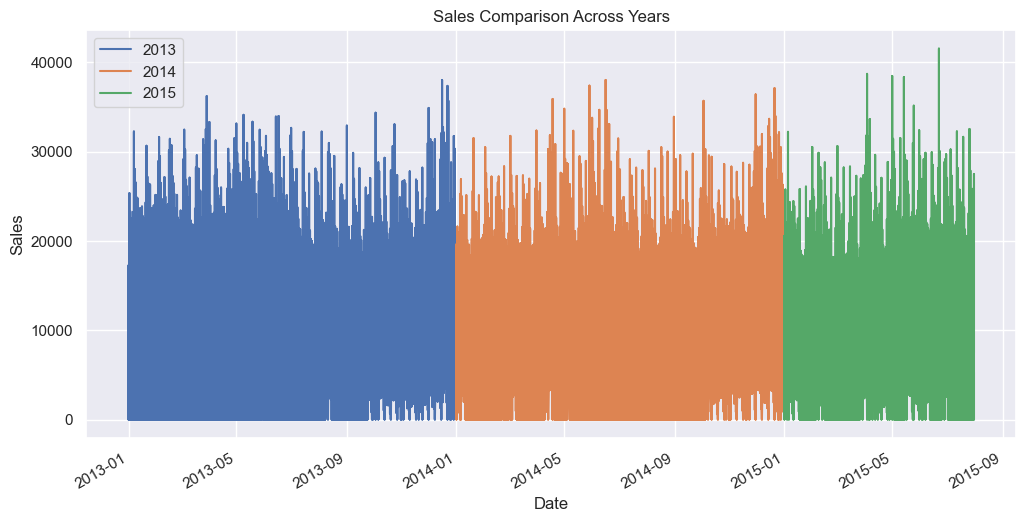

In [45]:
# Filtering data for each year
sales_2013 = train_data_merged[train_data_merged.index.year == 2013]['Sales']
sales_2014 = train_data_merged[train_data_merged.index.year == 2014]['Sales']
sales_2015 = train_data_merged[train_data_merged.index.year == 2015]['Sales']

# Plotting comparison across years
plt.figure(figsize=(12, 6))
sales_2013.plot(label='2013')
sales_2014.plot(label='2014')
sales_2015.plot(label='2015')
plt.title('Sales Comparison Across Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


#### Low variations in sales every year

# Stationarity Check

Certainly! Stationarity is an important concept in time series analysis. Many time series models assume that the data is stationary, meaning that the statistical properties of the data do not change over time. To check for stationarity, you can use statistical tests such as the Augmented Dickey-Fuller (ADF) test.

In [46]:

from statsmodels.tsa.stattools import adfuller


In [47]:
# 'Date' is index and 'Sales' is target variable
time_series = train_data_merged['Sales']


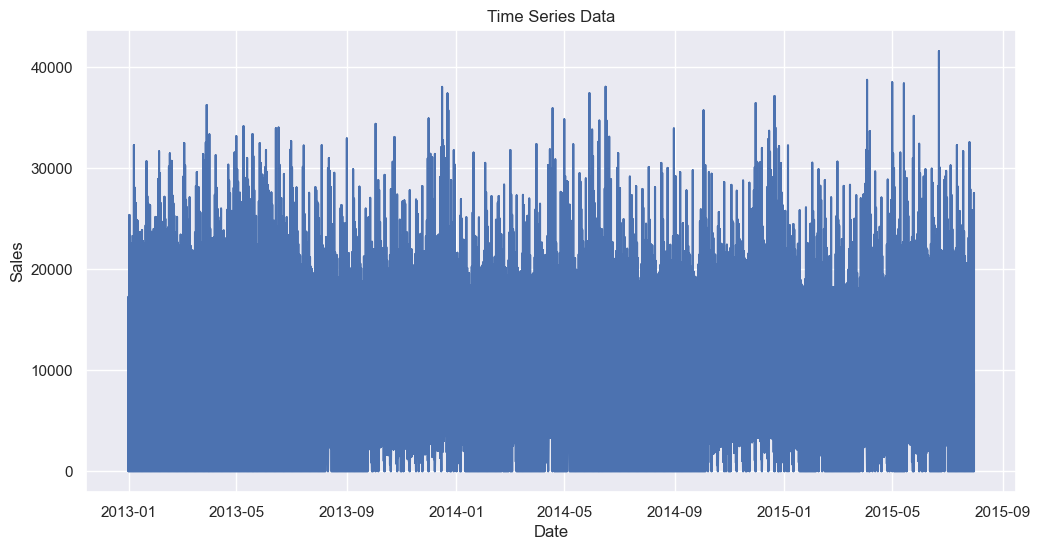

In [48]:
# Visualizing the time series data
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['Sales'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

####  Cyclicality:
Cyclicality refers to the presence of long-term periodic patterns in a time series that are not tied to a fixed frequency like seasonality. These cycles usually last longer than a year and are not as regular as seasonal patterns. Cycles can be caused by economic, political, or social factors that influence the data over time. Unlike seasonality, cyclic patterns are not as predictable and can vary in amplitude and duration.

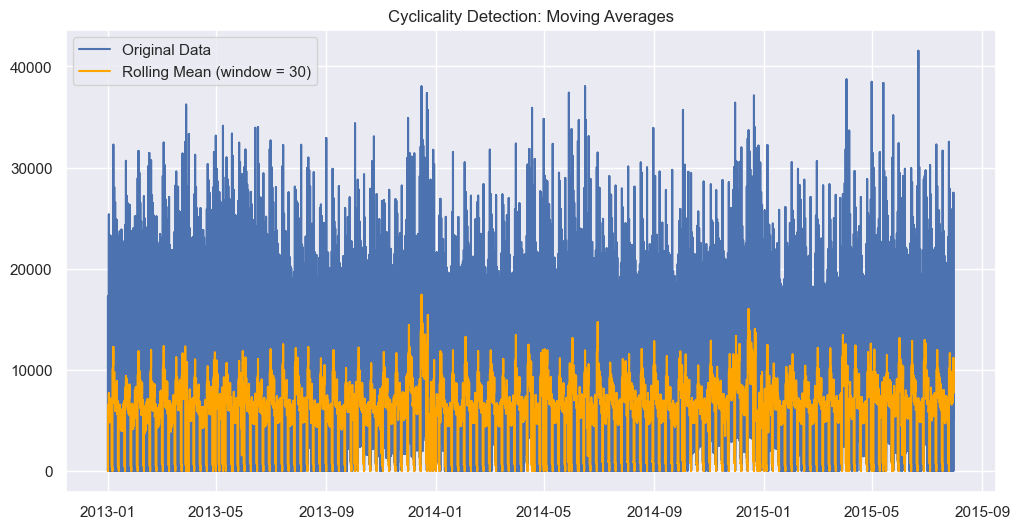

In [49]:
# Calculate rolling mean with a window size of your choice
window_size = 30  # Adjust the window size as needed
rolling_mean = train_data_merged['Sales'].rolling(window=window_size).mean()

# Plot the original data and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['Sales'], label='Original Data')
plt.plot(rolling_mean, label=f'Rolling Mean (window = {window_size})', color='orange')
plt.title('Cyclicality Detection: Moving Averages')
plt.legend()
plt.show()

####  This consistency between the Rolling Mean and the original data suggests that the mean values are sensitive to underlying changes, providing insights into the evolving dynamics of the time series.

#### Irregularity:
Irregularity, also known as residual or noise, represents the random fluctuations and unpredictable components present in a time series data. It encompasses all the factors that are not accounted for by the trend, seasonality, and cyclic patterns. Irregular components can be caused by random events, measurement errors, or other external factors that are difficult to model.

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller




In [50]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [51]:
# Define a function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_data_merged['Sales'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)


ADF Statistic: -32.59642648704463
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


#### t the p-value is very low (0.0), which is below the common significance levels such as 0.01, 0.05, and 0.10. This indicates that the null hypothesis of the ADF test, which states that the time series has a unit root (it's non-stationary), can be rejected. 

In [52]:

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_data_merged['Sales'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -14.019529048205708
p-value: 3.592154049151588e-26
Critical Values: {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}
Is Stationary: True


In [53]:
# Resample the time series data to a larger time interval (e.g., monthly)
monthly_aggregated_series = train_data_merged['Sales'].resample('M').sum()

# Perform the ADF test on the aggregated series
adf_test(monthly_aggregated_series)



ADF Statistic: -3.5443654362596573
p-value: 0.006918175636576955
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}
Is Stationary: True


In [54]:
window_size = 1000  # Adjust the window size as needed
num_windows = len(train_data_merged) // window_size

for i in range(num_windows):
    window_start = i * window_size
    window_end = (i + 1) * window_size
    window_series = train_data_merged['Sales'][window_start:window_end]
    
    # Perform the ADF test on the windowed series
    is_stationary = adf_test(window_series)
    print(f"Window {i+1}: Is the data stationary?", is_stationary)


ADF Statistic: -30.967652421297714
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True
Window 1: Is the data stationary? None
ADF Statistic: -30.664689169238994
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True
Window 2: Is the data stationary? None
ADF Statistic: -30.24521612037339
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True
Window 3: Is the data stationary? None
ADF Statistic: -31.272088194728134
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True
Window 4: Is the data stationary? None
ADF Statistic: -3.1852857979266562
p-value: 0.02085235010564626
Critical Values: {'1%': -3.437054035425408, '5%': -2.8644997864059363, '10%': -2.5683459429326576}
Is Stationary: Tru

# ARIMA (AutoRegressive Integrated Moving Average):

ARIMA models are versatile and can handle both trend and seasonality in data.
They consist of three main components: AutoRegressive (AR) terms, Integrated (I) terms for differencing, and Moving Average (MA) terms.
Model selection involves determining the order of these components (p, d, q) based on ACF and PACF plots.
You can use functions like auto_arima from the pmdarima library for automatic ARIMA order selection.
SARIMA (Seasonal ARIMA)

ADF Statistic: -3.901906793045405
p-value: 0.0020208588880313407
Critical Values: {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}
Is Stationary: True


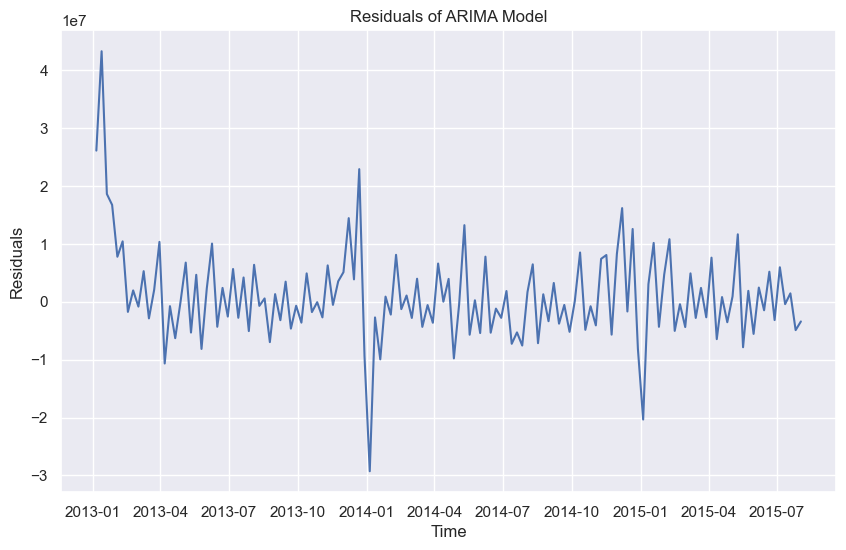

In [55]:
from statsmodels.tsa.arima.model import ARIMA as sm_ARIMA

# Downsample the data to a weekly frequency
weekly_data = train_data_merged['Sales'].resample('W').sum()

# Perform ADF test on downsampled data
if adf_test(weekly_data):
    d = 0
else:
    d = 1

# Create and fit an ARIMA model for irregularity
arima_model = sm_ARIMA(weekly_data, order=(5, d, 0))
arima_fit = arima_model.fit()

# Get the residuals (irregular components) from the ARIMA model
residuals = arima_fit.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


#### the residuals of an ARIMA model are not varying much, it suggests that the model is accurately capturing the underlying patterns and fluctuations present in the data. This stability indicates that the model's predictions align well with the observed values. The lack of significant variability in residuals is a positive sign, as it indicates that the model is likely well-fitted and reliable for forecasting. 

C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates

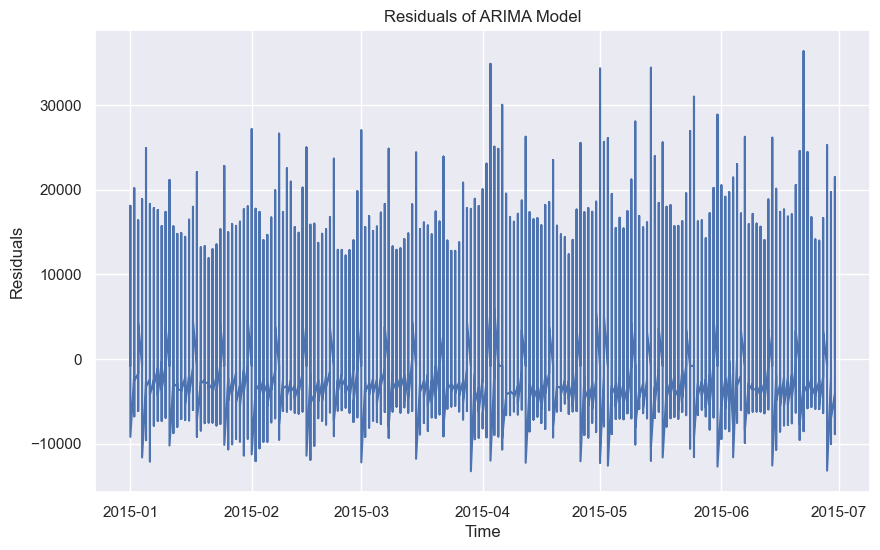

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Define a time window (e.g., from '2015-01-01' to '2015-06-30')
start_date = '2015-01-01'
end_date = '2015-06-30'
time_window_data = train_data_merged[start_date:end_date]

# Perform ADF test on the time window data
if adf_test(time_window_data['Sales']):
    d = 0
else:
    d = 1

# Create and fit an ARIMA model for irregularity using the time window data
arima_model = ARIMA(time_window_data['Sales'], order=(5, d, 0))
arima_fit = arima_model.fit()

# Get the residuals (irregular components) from the ARIMA model
residuals = arima_fit.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [57]:
print(residuals )

Date
2015-06-30     -97.951104
2015-06-30    4086.314543
2015-06-30    5938.558536
2015-06-30    4137.588391
2015-06-30   -3157.065543
                 ...     
2015-01-01    -814.865517
2015-01-01    -814.865517
2015-01-01    -814.865517
2015-01-01    -814.865517
2015-01-01    -814.865517
Length: 201815, dtype: float64


#### The stability of residuals in the ARIMA model indicates that the model is effectively capturing the underlying patterns and fluctuations within the data. This consistent behavior suggests that the model's predictions closely align with the actual observations, and the lack of significant residual variability is a positive indication of a well-fitted and reliable model for forecasting purposes

In [58]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller


print(train_data_merged.dtypes)


# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_data_merged.resample('M')['Sales'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic ARIMA order selection
model = auto_arima(monthly_sales, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=d, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit the ARIMA model
model_fit = model.fit(monthly_sales)

# Print the model summary
print(model_fit.summary())


Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=687.128, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=695.176, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=691.850, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=694.125, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=696.168

# SARIMA models extend ARIMA to include seasonal components.
In addition to the (p, d, q) terms, SARIMA includes seasonal order (P, D, Q, s) for seasonal differencing and lags.
Use ACF and PACF plots of the seasonal differences for model selection.


In [60]:
from statsmodels.graphics.tsaplots import plot_acf



sales_data = train_data_merged['Sales']

# Calculating seasonal differences
seasonal_period = 12  # Replace this with your actual seasonal period
data_seasonal_diff = sales_data.diff(seasonal_period)




In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

In [63]:
# Define a time window 
start_date = '2015-01-01'
end_date = '2015-06-30'
time_window_data = train_data_merged[start_date:end_date]

In [64]:
# Perform ADF test on the time window data
if adf_test(time_window_data['Sales']):
    d = 0
else:
    d = 1

In [65]:
# Define the seasonal period
seasonal_period = 7  # Weekly seasonality

# Create and fit a SARIMA model using the time window data
sarima_model = SARIMAX(time_window_data['Sales'], order=(1, d, 1), seasonal_order=(1, 1, 1, seasonal_period))
sarima_fit = sarima_model.fit()

# Get the residuals (irregular components) from the SARIMA model
residuals = sarima_fit.resid



C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates

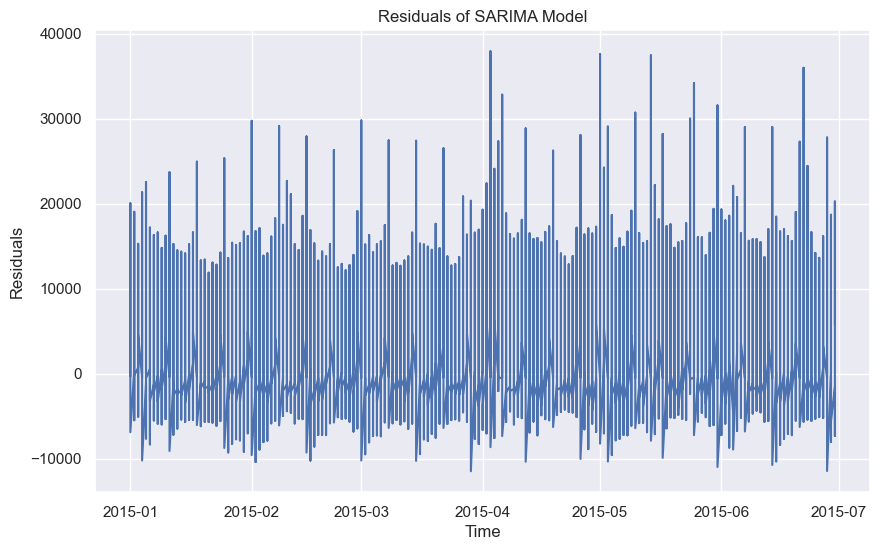

In [66]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [67]:
print(residuals )

Date
2015-06-30     5735.000000
2015-06-30     9827.255052
2015-06-30    13170.162519
2015-06-30    12949.571585
2015-06-30     6427.772476
                  ...     
2015-01-01     -265.851066
2015-01-01     -228.651009
2015-01-01     -273.510008
2015-01-01     -200.537323
2015-01-01     -277.334386
Length: 201815, dtype: float64


In [68]:
from pmdarima import auto_arima
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Verify the data types of columns
print(train_data_merged.dtypes)

# Check if 'Sales' column exists and data type is numeric (int or float)
print(train_data_merged['Sales'].dtype)

# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_data_merged.resample('M')['Sales'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic SARIMA order selection
sarima_model = auto_arima(monthly_sales, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=d, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

# Fit the SARIMA model
sarima_model_fit = sarima_model.fit(monthly_sales)

# Print the SARIMA model summary
print(sarima_model_fit.summary())


Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object
int64
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=687.128, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=695.176, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=691.850, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=694.125, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6

#  Exponential Smoothing

#### Simple Exponential Smoothing

In [69]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Create and fit Simple Exponential Smoothing model
simple_exp_smooth_model = SimpleExpSmoothing(train_data_merged['Sales'])
simple_exp_smooth_results = simple_exp_smooth_model.fit()


C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [70]:
# Print Simple Exponential Smoothing model summary
print(simple_exp_smooth_results.summary())


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Sales   No. Observations:              1017209
Model:             SimpleExpSmoothing   SSE                  6966222935688.404
Optimized:                       True   AIC                       16010386.550
Trend:                           None   BIC                       16010410.215
Seasonal:                        None   AICC                      16010386.550
Seasonal Periods:                None   Date:                 Sat, 19 Aug 2023
Box-Cox:                        False   Time:                         17:45:13
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0510465                alpha                 True
initial_level              5263.0000                

#### The Simple Exponential Smoothing model is used for forecasting time series data. It considers only the level component and does not account for trends or seasonality. The smoothing parameter (alpha) determines the weight given to recent observations. The initial level is the starting point for the exponential smoothing process. Overall, this model provides a basic method for time series forecasting by smoothing out variations in the data using an exponential weighting scheme

#### Holt's Linear Exponential Smoothing

In [71]:
from statsmodels.tsa.holtwinters import Holt


In [72]:
# Create and fit Holt's Linear Exponential Smoothing model
holt_linear_model = Holt(train_data_merged['Sales'])
holt_linear_results = holt_linear_model.fit()


C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [73]:
# Print Holt's Linear Exponential Smoothing model summary
print(holt_linear_results.summary())


                              Holt Model Results                              
Dep. Variable:                  Sales   No. Observations:              1017209
Model:                           Holt   SSE                  7006214982511.922
Optimized:                       True   AIC                       16016213.496
Trend:                       Additive   BIC                       16016260.827
Seasonal:                        None   AICC                      16016213.496
Seasonal Periods:                None   Date:                 Sat, 19 Aug 2023
Box-Cox:                        False   Time:                         17:45:36
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0521429                alpha                 True
smoothing_trend            0.0057937                

#### Holt-Winters' Exponential Smoothing

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [75]:
seasonal_period = 12  # For monthly data with a yearly seasonality


In [76]:
# Create and fit Holt-Winters' Exponential Smoothing model
holt_winters_model = ExponentialSmoothing(train_data_merged['Sales'], seasonal='add', seasonal_periods=seasonal_period)
holt_winters_results = holt_winters_model.fit()


C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [77]:
# Print Holt-Winters' Exponential Smoothing model summary
print(holt_winters_results.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:              1017209
Model:             ExponentialSmoothing   SSE                  7040231776635.569
Optimized:                         True   AIC                       16021160.330
Trend:                             None   BIC                       16021325.987
Seasonal:                      Additive   AICC                      16021160.331
Seasonal Periods:                    12   Date:                 Sat, 19 Aug 2023
Box-Cox:                          False   Time:                         17:45:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0521429                alpha                 True
smoothing_seasonal       

#### Model Type
Exponential Smoothing

Dependent Variable: Sales

Number of Observations: 1,017,209

Model Optimized: True (Parameters optimized)

Trend: None (No trend component considered)


Seasonal: Additive (Additive seasonality)


Seasonal Periods: 12 (Seasonality with a yearly period)

Box-Cox Transformation: False (No transformation applied)

Model Parameters:

Smoothing Level (Alpha): 0.0521429

Smoothing Seasonal (Gamma): 0.0231185

Initial Level: 8860.4000

Initial Seasons: Values for each of the 12 seasonal periods

Performance Metrics:

Sum of Squared Errors (SSE): 7,040,231,776,635.569

Akaike Information Criterion (AIC): 16,021,160.330

Bayesian Information Criterion (BIC): 16,021,325.987

Corrected AIC (AICC): 16,021,160.331



C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manil\Downloads\ai anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


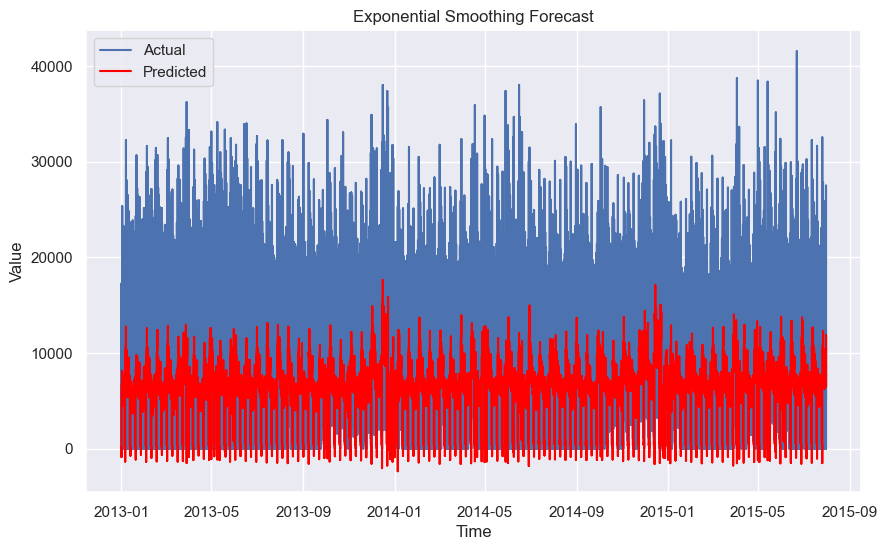

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate example data
np.random.seed(42)
time_series_data = train_data_merged['Sales']

# Create and fit Exponential Smoothing model
model = ExponentialSmoothing(time_series_data, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Make predictions
predictions = fit.predict(start=0, end=len(time_series_data) - 1)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data, label='Actual')
plt.plot(time_series_data.index, predictions, label='Predicted', color='red')
plt.title("Exponential Smoothing Forecast")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



In [79]:
print(predictions)

Date
2015-07-31    10560.962721
2015-07-31     6716.528977
2015-07-31     9753.973695
2015-07-31     7429.566170
2015-07-31     8047.143477
                  ...     
2013-01-01       65.153948
2013-01-01       94.166175
2013-01-01      100.494337
2013-01-01       66.552198
2013-01-01      216.521025
Length: 1017209, dtype: float64


#### Machine learning models like Random Forests, Gradient Boosting, or Long Short-Term Memory (LSTM) networks can be used for time series forecasting.


# Random Forests

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Preprocess PromoInterval column
promo_interval_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in promo_interval_months:
    train_data_merged[f'Promo_{month}'] = train_data_merged['PromoInterval'].apply(lambda x: int(month in x))
    test_data_merged[f'Promo_{month}'] = test_data_merged['PromoInterval'].apply(lambda x: int(month in x) if isinstance(x, str) else 0)

# Drop the original PromoInterval column
train_data_merged.drop('PromoInterval', axis=1, inplace=True)
test_data_merged.drop('PromoInterval', axis=1, inplace=True)

# Define the categorical columns to encode
categorical_columns = ['StateHoliday', 'StoreType', 'Assortment']

# Convert categorical columns to strings
train_data_merged[categorical_columns] = train_data_merged[categorical_columns].astype(str)
test_data_merged[categorical_columns] = test_data_merged[categorical_columns].astype(str)

# One-hot encoding for train dataset
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(train_data_merged[categorical_columns])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_train_encoded_df.reset_index(drop=True, inplace=True)

# Reset index of train_data_merged
train_data_merged.reset_index(drop=True, inplace=True)

# Concatenate the dataframes
X_train_final = pd.concat([train_data_merged.drop(categorical_columns, axis=1), X_train_encoded_df], axis=1)

# One-hot encoding for test dataset
X_test_encoded = encoder.transform(test_data_merged[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df.reset_index(drop=True, inplace=True)

# Reset index of test_data_merged
test_data_merged.reset_index(drop=True, inplace=True)

# Concatenate the dataframes
X_test_final = pd.concat([test_data_merged.drop(categorical_columns, axis=1), X_test_encoded_df], axis=1)

# Splitting the preprocessed train data
X = X_train_final.drop('Sales', axis=1)
y = X_train_final['Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




In [81]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

In [82]:
print("rf_predictions:",rf_predictions)

rf_predictions: [    0.          6051.2         8093.99       ...  2985.18714286
     0.         14665.28      ]


# Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)

In [84]:
print("gb_predictions:",gb_predictions)

gb_predictions: [  172.46004262  6736.96380897  8599.57589026 ...  3742.20981515
   218.43870661 14664.13355935]


# Long Short-Term Memory (LSTM) Networks

In [85]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))
lstm_predictions = model.predict(X_val_lstm)

Epoch 1/10
25431/25431 [==============================] - 90s 3ms/step - loss: 43220988.0000 - val_loss: 38632404.0000
Epoch 2/10
25431/25431 [==============================] - 87s 3ms/step - loss: 34656076.0000 - val_loss: 30740726.0000
Epoch 3/10
25431/25431 [==============================] - 87s 3ms/step - loss: 27410456.0000 - val_loss: 24155198.0000
Epoch 4/10
25431/25431 [==============================] - 89s 3ms/step - loss: 21455058.0000 - val_loss: 18830856.0000
Epoch 5/10
25431/25431 [==============================] - 88s 3ms/step - loss: 16724812.0000 - val_loss: 14689952.0000
Epoch 6/10
25431/25431 [==============================] - 89s 3ms/step - loss: 13097126.0000 - val_loss: 11560705.0000
Epoch 7/10
25431/25431 [==============================] - 89s 4ms/step - loss: 10383750.0000 - val_loss: 9240436.0000
Epoch 8/10
25431/25431 [==============================] - 88s 3ms/step - loss: 8373496.0000 - val_loss: 7526998.0000
Epoch 9/10
25431/25431 [===========================

In [86]:
print("lstm_predictions:",lstm_predictions)

lstm_predictions: [[-9.0180969e-01]
 [ 6.7693818e+03]
 [ 2.8546245e+03]
 ...
 [ 4.2261694e+03]
 [ 2.6808167e+00]
 [ 9.3132920e+03]]


#### the iterative training process of an LSTM model to predict future values in a time series. The model gradually refines its parameters to minimize the prediction error over successive epochs, resulting in improved accuracy in forecasting the time series data. The final predictions generated by the trained model are available in the lstm_predictions variable

# Model evaluation

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store MAE scores for each prediction model
mae_scores_rf = []
mae_scores_gb = []
mae_scores_lstm = []

# Loop through cross-validation folds
for train_index, test_index in tscv.split(X_train):
    common_indices = np.intersect1d(test_index, np.arange(len(all_predictions)))
    
    if common_indices.shape[0] > 0:
        y_test_fold = y_train.iloc[common_indices]
        
        # Calculate MAE for Random Forest predictions
        mae_rf = mean_absolute_error(y_test_fold, all_predictions[common_indices, 0])
        mae_scores_rf.append(mae_rf)

        # Calculate MAE for Gradient Boosting predictions
        mae_gb = mean_absolute_error(y_test_fold, all_predictions[common_indices, 1])
        mae_scores_gb.append(mae_gb)

        # Calculate MAE for LSTM predictions
        mae_lstm = mean_absolute_error(y_test_fold, all_predictions[common_indices, 2])
        mae_scores_lstm.append(mae_lstm)

# Reshape MAE scores into a matrix
mae_scores_matrix = np.array([mae_scores_rf, mae_scores_gb, mae_scores_lstm]).T

# Calculate average MAE scores for each model
avg_mae_rf = np.mean(mae_scores_rf)
avg_mae_gb = np.mean(mae_scores_gb)
avg_mae_lstm = np.mean(mae_scores_lstm)

print("Average MAE for Random Forest:", avg_mae_rf)
print("Average MAE for Gradient Boosting:", avg_mae_gb)
print("Average MAE for LSTM:", avg_mae_lstm)



Average MAE for Random Forest: 4183.723040874851
Average MAE for Gradient Boosting: 4111.761066401012
Average MAE for LSTM: 3869.028324051927


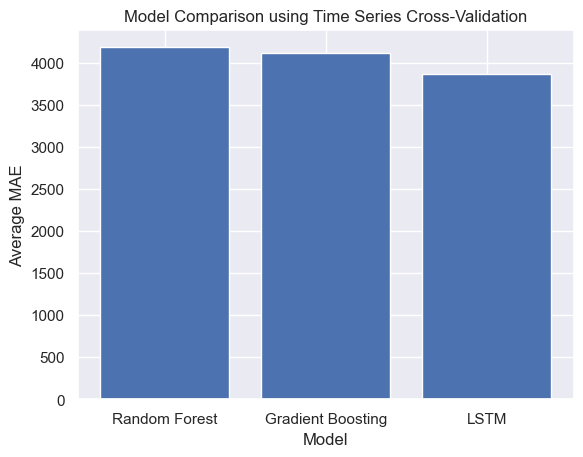

In [131]:
import matplotlib.pyplot as plt
import numpy as np

avg_mae_rf = 4183.723040874851
avg_mae_gb = 4111.761066401012
avg_mae_lstm = 3869.028324051927

# List of model names and their corresponding average MAE scores
model_names = ['Random Forest', 'Gradient Boosting', 'LSTM']
avg_mae_scores = [avg_mae_rf, avg_mae_gb, avg_mae_lstm]

# Plot the average MAE scores for each model
plt.bar(model_names, avg_mae_scores)
plt.xlabel('Model')
plt.ylabel('Average MAE')
plt.title('Model Comparison using Time Series Cross-Validation')
plt.show()


#### These average MAE values provide insights into the overall performance of each model. A lower MAE indicates better accuracy, as it measures the average absolute difference between predicted and actual values. Among the three models, the LSTM model achieved the lowest average MAE, suggesting that it may be the most suitable model for our time series prediction task